# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [100, 310, 423]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11594,7779,12144,3252,8035,3029
1,7034,1492,2405,12569,299,1117
2,17565,3686,4657,1059,1803,668


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Based on the purchase cost of the different product category the sample customers can be classified as follows:

- **Sample 0 Index[100]**  
This establishment has higher spending amounts for all the six categories of product. The total purchase cost of each of the product category is comparable or more than their respective third quartile amount and higher than their respective mean amount. This indicates that the concern has a very high volumn of consumption of almost all product categories, without any proper trend in the respective consumption. Such business should be a large retailer such as **Super Market or a Hyper market** selling different types of products in their store. 

- **Sample 1 Index[310]**   
This customer has significantly very low spending amounts compared to **Sample 0**. The total purchase cost of all product categories, except Frozen, have values lower than mean and median. Milk, Grocery and Detergent Paper categories are very low, that is, lower or comparable to the first quartile, while Fresh and Delicatessen little less than and more than the median respectively. The purchase cost of Frozen is, however, higher than their respective third quartile amount.  
Since, the consumption of product category such as Delicatessen and Frozen are higher and that of Detergent Paper is very low, we can consider this as a business where these higher category are sold over the counter or as take aways because the purchase of cleaning products is very low inferring less of cleaning work done. So, this concern is a kind of **Fast food with small dining space or Street Food Trucks**.

- **Sample 2 Index[423]**  
The spending amount for Fresh category is extremely high, higher than its respective third quartile value, compared to the rest of the product categories. The amount of spending on Milk and Grocery is also high, nearing almost to their respective median values, while the purchase of other three product categories are lower in value compared to the first three.  
The figures indicate that such a business is of one dealing mainly with Fresh food items, such as Fruits and Vegetables, Milk and Grocery are also categories that are relative to this Fresh food items and thus higher that other categories. It can also be noted that there is a very low consumption of prepared meals, processed food items etc., as the value of Frozen and Delicatessan is very low. We can thus obtain that the concern is most likely a market that sells Fresh Food, so a **Farmer's market vendor**.

---


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
feature_scores = {}

for feature in data.keys():
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([feature], axis = 1)
    feature_dropped = data[feature]
    
    warnings.filterwarnings("ignore", category = DeprecationWarning)

# TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, feature_dropped, test_size=0.25, random_state=30)

# TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=12)
    regressor.fit(X_train, y_train)

    score = regressor.score(X_test, y_test)
    feature_scores[feature] = round(score,4)

# TODO: Report the score of the prediction using the testing set
#score = None
display(pd.DataFrame(feature_scores.items(), columns=['Features', 'R^2 Score']))

/home/prity/.conda/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Features,R^2 Score
0,Grocery,0.4443
1,Frozen,-1.9974
2,Delicatessen,0.0461
3,Detergents_Paper,0.7067
4,Fresh,-0.0848
5,Milk,0.1856


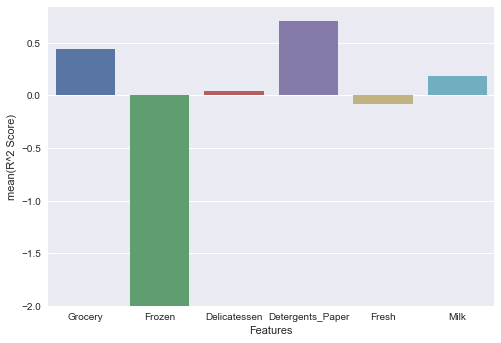

In [5]:
feature_scored = pd.DataFrame(feature_scores.items(), columns=['Features', 'R^2 Score'])
sns.barplot(data=feature_scored, x="Features", y="R^2 Score")

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

In the above code implemented I have tried to identify the customers' spending habits by predicting each of the six features one at a time. 

Based on the result it is clear that only **'Detergents_Paper'** is the feature when attempted to predict gives a positive score higher than 0.5, that is, 0.7067. 

It is known that coefficient of determination R^2 is used to identify the goodness of fit. A score close to 1 is a perfect fit, and a score of less than 0.5 indicates that the model is not a good fit, while a score less than 0 indicates that the model fails to predict the data. 

A positive R^2 score more than 0.5 and nearer to 1  indicates that our model fits the data and is capable of predicting this feature. This suggests that out of the six features only **'Detergents_Paper'** can be most accurately predicted by training the model on other five features. 

Thus, this feature is not necessary for identifying the customers' spending habits, as it does not add any information to the data which other features cannot bring, while all the other five features are important and necessary as each of these cannot be predicted as also seen from the result of the above code. The R^2 scores for rest of the features are less than 0.5. 

----  


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

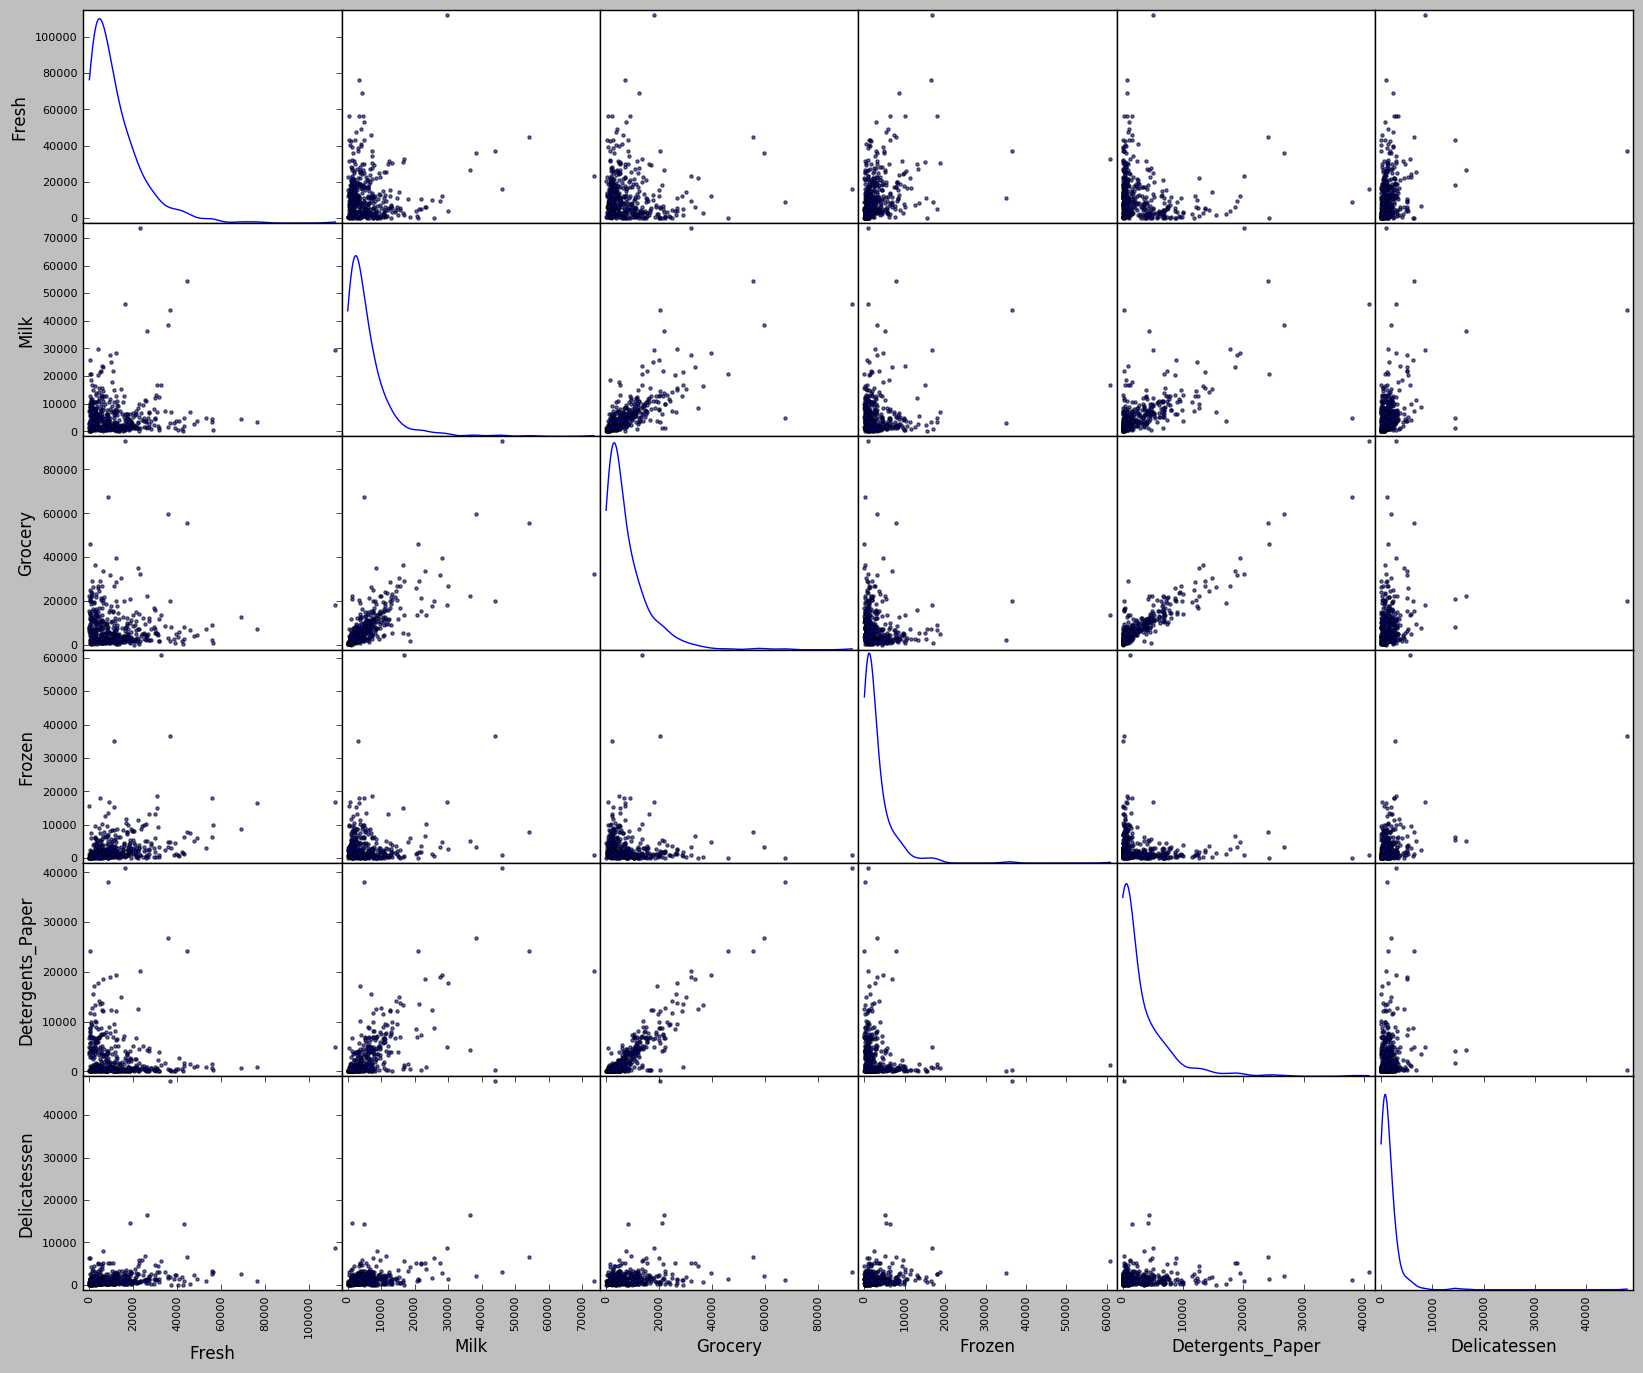

In [6]:
# Produce a scatter matrix for each pair of features in the data
plt.style.use('classic')
pd.scatter_matrix(data, alpha = 0.6, figsize = (20,16), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


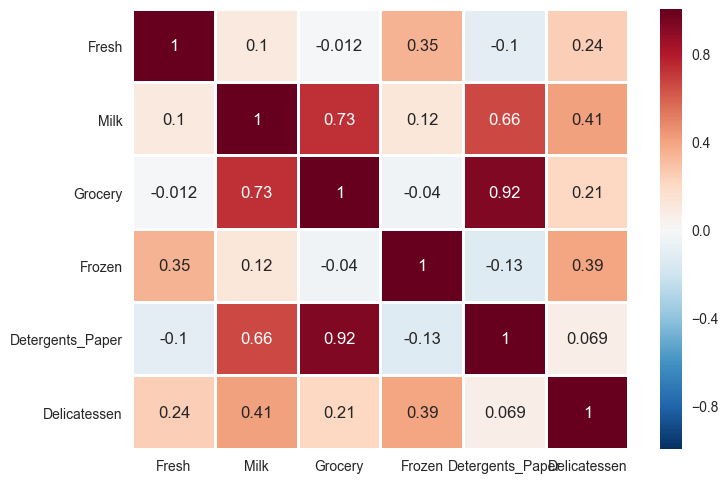

In [7]:
plt.style.use('seaborn')
display(data.corr())
sns.heatmap(data.corr(), annot=True, linewidths=1.5)

**Answer:**

From the above heatmap and also the scatter matrix it can be seen that the following feature pairs are correlated. They are:

- Grocery and Detergents_Paper
- Milk and Detergents_Paper, and finally
- Milk and Grocery

Thus it is clear that **'Detergents_Paper'** is correlated to two feature, namely, Milk and Grocery. It is strongly correlated with Grocery and hence a dependent variable, thus asserting the discussion of the answer in Question 2, that it does not add relevance in determining the customer purchasing segment. 

All the six features are skewed, the distribution is highly skewed to the right, also called *right-skewed* or positively skewed data. A large number of data points lie in the first part of the data range. This can be also be inferred from a statistical description of the dataset. The median of every feature is less than the mean, and the third quartile is significantly lower than the maximum values for each of the features, suggesting that a huge number of data points lie in the beginning and very few probably outliers lie towards the tail of distribution, making it right skewed.

Logarithmic transformations are useful for such skewed data so that the distribution can be transformed to more normal.

---


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

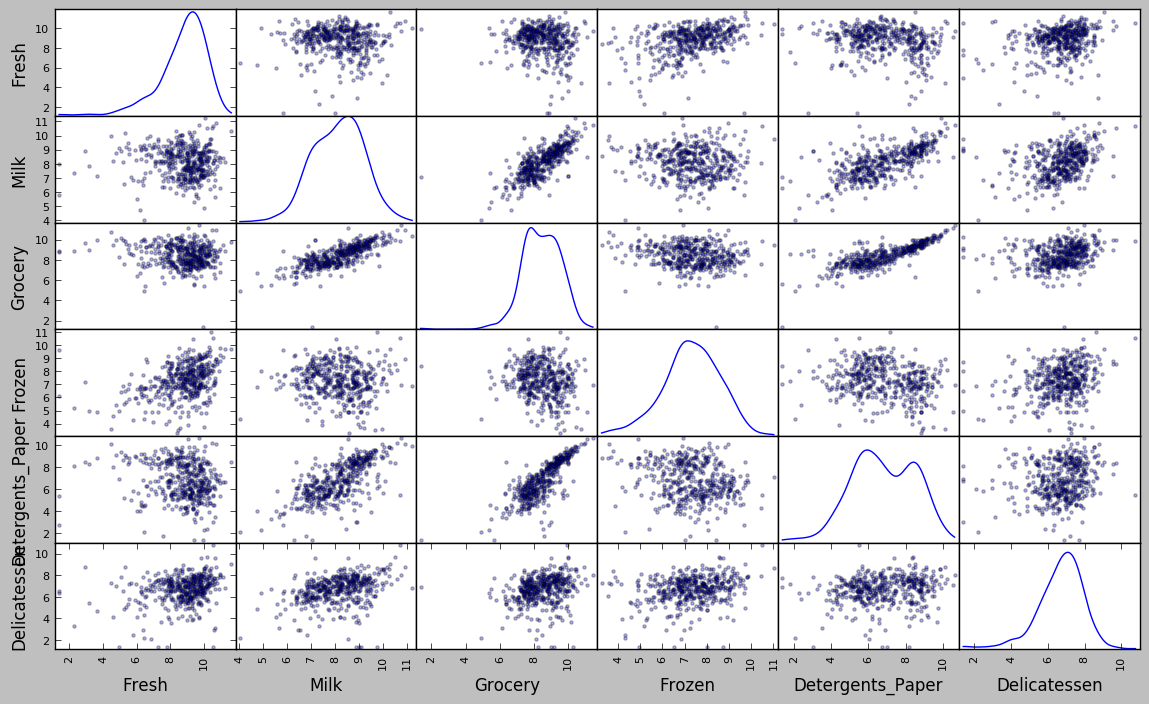

In [8]:
# TODO: Scale the data using the natural logarithm
log_data = data.apply(lambda x: np.log(x + 1))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(x + 1))

plt.style.use('classic')
# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

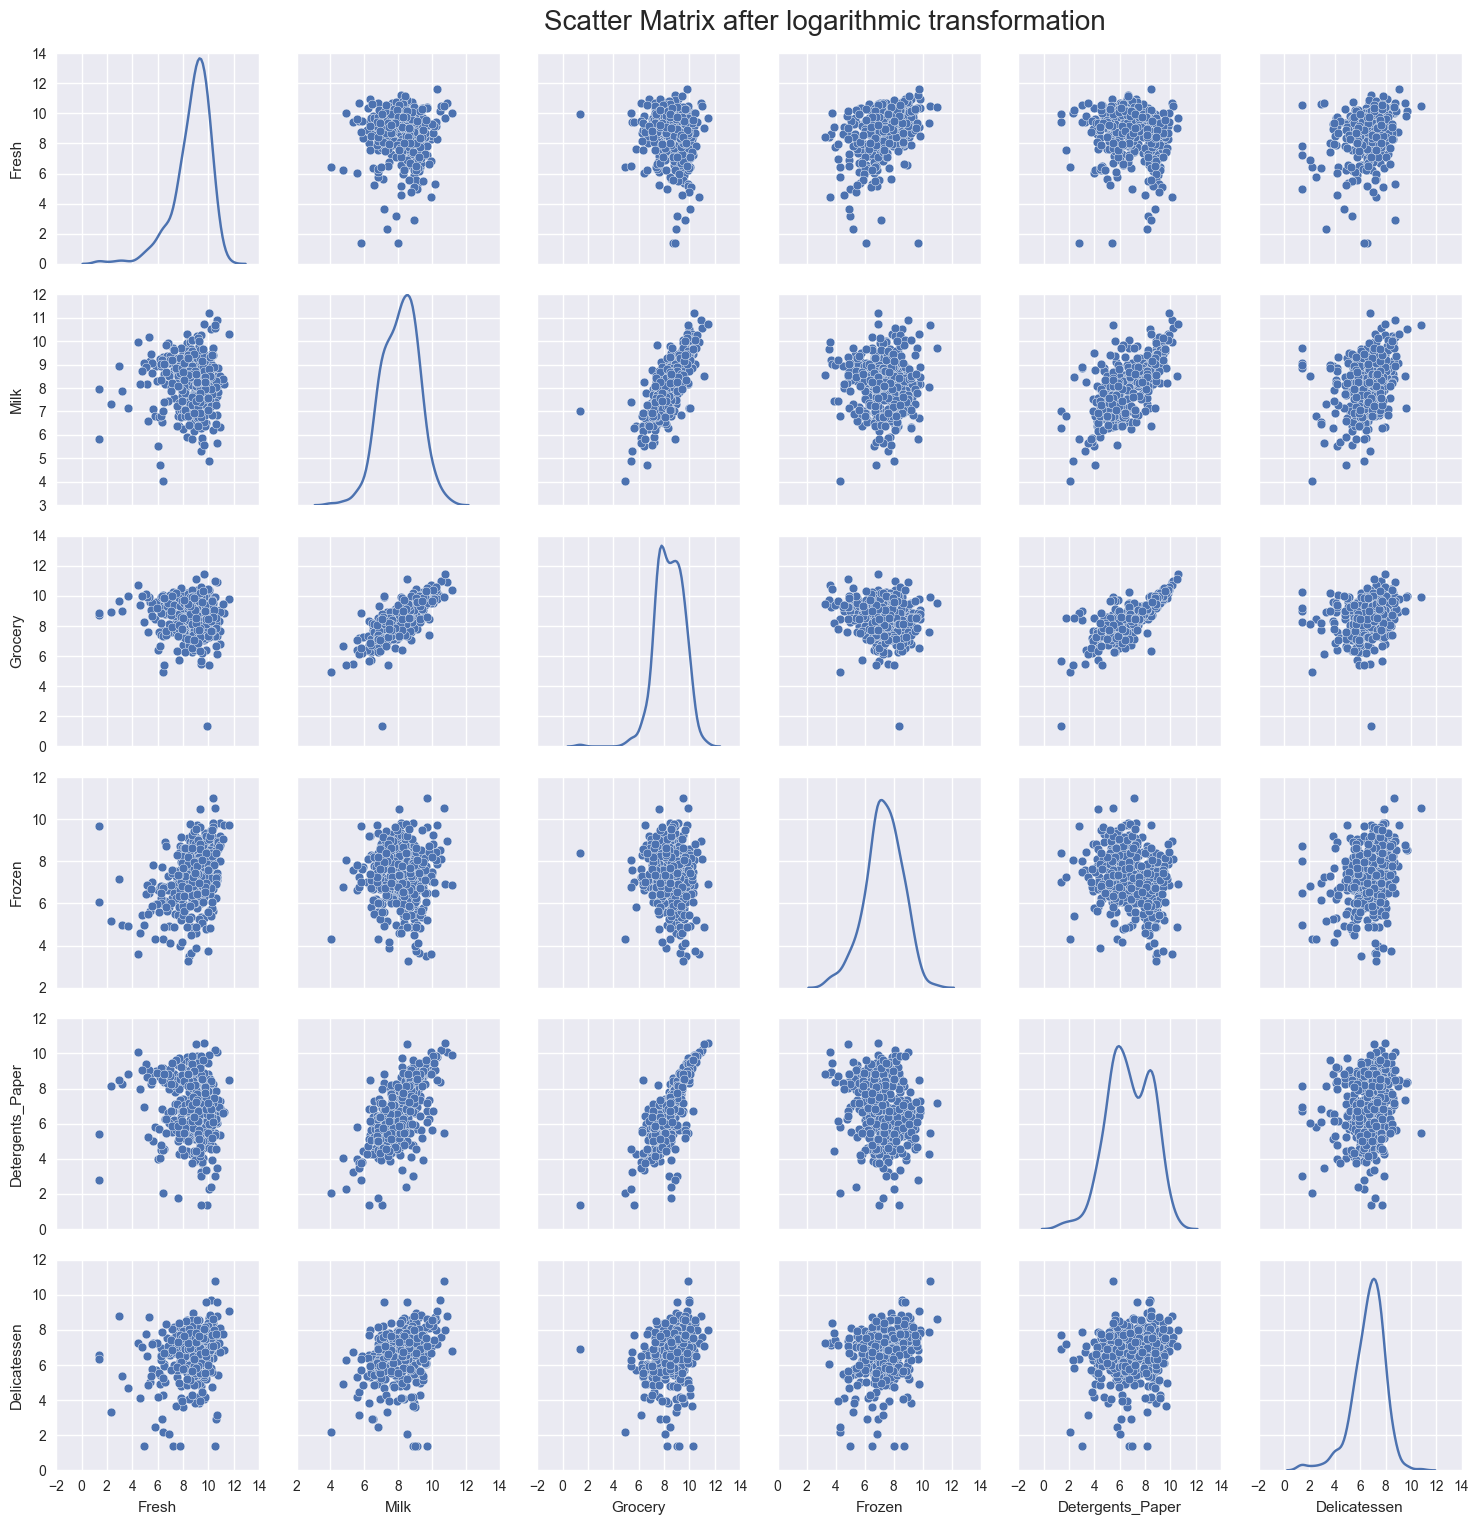

In [9]:
plt.style.use('seaborn')
g = sns.pairplot(log_data, diag_kind="kde", plot_kws=dict(s=40, edgecolor="w"))
g.fig.text(0.37, 1.00,'Scatter Matrix after logarithmic transformation', fontsize=20)

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.358329,8.959312,9.404673,8.087333,8.991687,8.016318
1,8.858653,7.308543,7.785721,9.439068,5.703782,7.019297
2,9.773720,8.212568,8.446341,6.966024,7.497762,6.505784


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
outliers = []
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1) * 1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outlier_data = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outlier_data.sort(feature))    
    outliers += list(outlier_data.index)

outliers = [out for out in outliers if outliers.count(out) > 1]
outliers = list(set(outliers))
outliers_mtone = list(outliers)
outliers += [95, 96, 109, 142, 161, 183, 187, 218, 338, 357]
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True).sort()

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
95,1.386294,7.979681,8.740817,6.089045,5.411646,6.565265
338,1.386294,5.811141,8.856803,9.655154,2.772589,6.311735
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
218,2.944439,8.923325,9.629445,7.159292,8.475954,8.759826
96,3.178054,7.869784,9.001962,4.983607,8.262301,5.384495
357,3.637586,7.151485,10.011130,4.927254,8.817001,4.709530
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
412,4.584967,8.190354,9.425532,4.595120,7.996654,4.143135
353,4.770685,8.742734,9.961945,5.433722,9.069122,7.013915
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
98,6.222576,4.727388,6.658011,6.797940,4.043051,4.890349
356,10.029547,4.905275,5.389072,8.057694,2.302585,6.308098
86,10.040027,11.205027,10.377078,6.895683,9.907031,6.806829


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
420,8.402231,8.569216,9.490091,3.258097,8.827468,7.239933
38,8.432071,9.663325,9.723763,3.526361,8.847504,6.073045
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
57,8.597482,9.203718,9.257987,3.663562,8.932345,7.156956
145,10.000614,9.034200,10.457171,3.761200,9.440817,8.396381
429,9.060447,7.467942,8.183397,3.871201,4.442651,7.824846
175,7.759614,8.967759,9.382191,3.970292,8.342125,7.437206
264,6.979145,9.177817,9.645105,4.127134,8.696343,7.143618
439,7.933080,7.437795,7.828436,4.189655,6.169611,3.970292
325,10.395681,9.728241,9.519808,11.016496,7.149132,8.632306


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
161,9.428270,6.293419,5.648974,6.996681,1.386294,7.711549


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
109,7.249215,9.724959,10.274603,6.513230,6.729824,1.386294
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
142,10.519673,8.875287,9.018453,8.005033,3.044522,1.386294
187,7.799343,8.987572,9.192176,8.743532,8.149024,1.386294
233,6.872128,8.514189,8.106816,6.843750,6.016157,2.079442
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
184,5.793014,6.823286,8.457655,4.317488,5.814131,2.484907
203,6.369901,6.530878,7.703910,6.152733,6.861711,2.944439
285,10.602989,6.463029,8.188967,6.949856,6.079933,2.944439
289,10.663990,5.659482,6.156979,7.236339,3.496508,3.135494


In [12]:
print "Outlier indices occurring in more than one feature are: {}".format(np.sort(outliers_mtone))
print "Number of outlier selected: {}".format(len(outliers))
print "The selected outlier indices: {}".format(np.sort(outliers))
print "The good data after outlier removal, now has {} data".format(good_data.shape[0])

Outlier indices occurring in more than one feature are: [ 65  66  75 128 154]
Number of outlier selected: 15
The selected outlier indices: [ 65  66  75  95  96 109 128 142 154 161 183 187 218 338 357]
The good data after outlier removal, now has 425 data


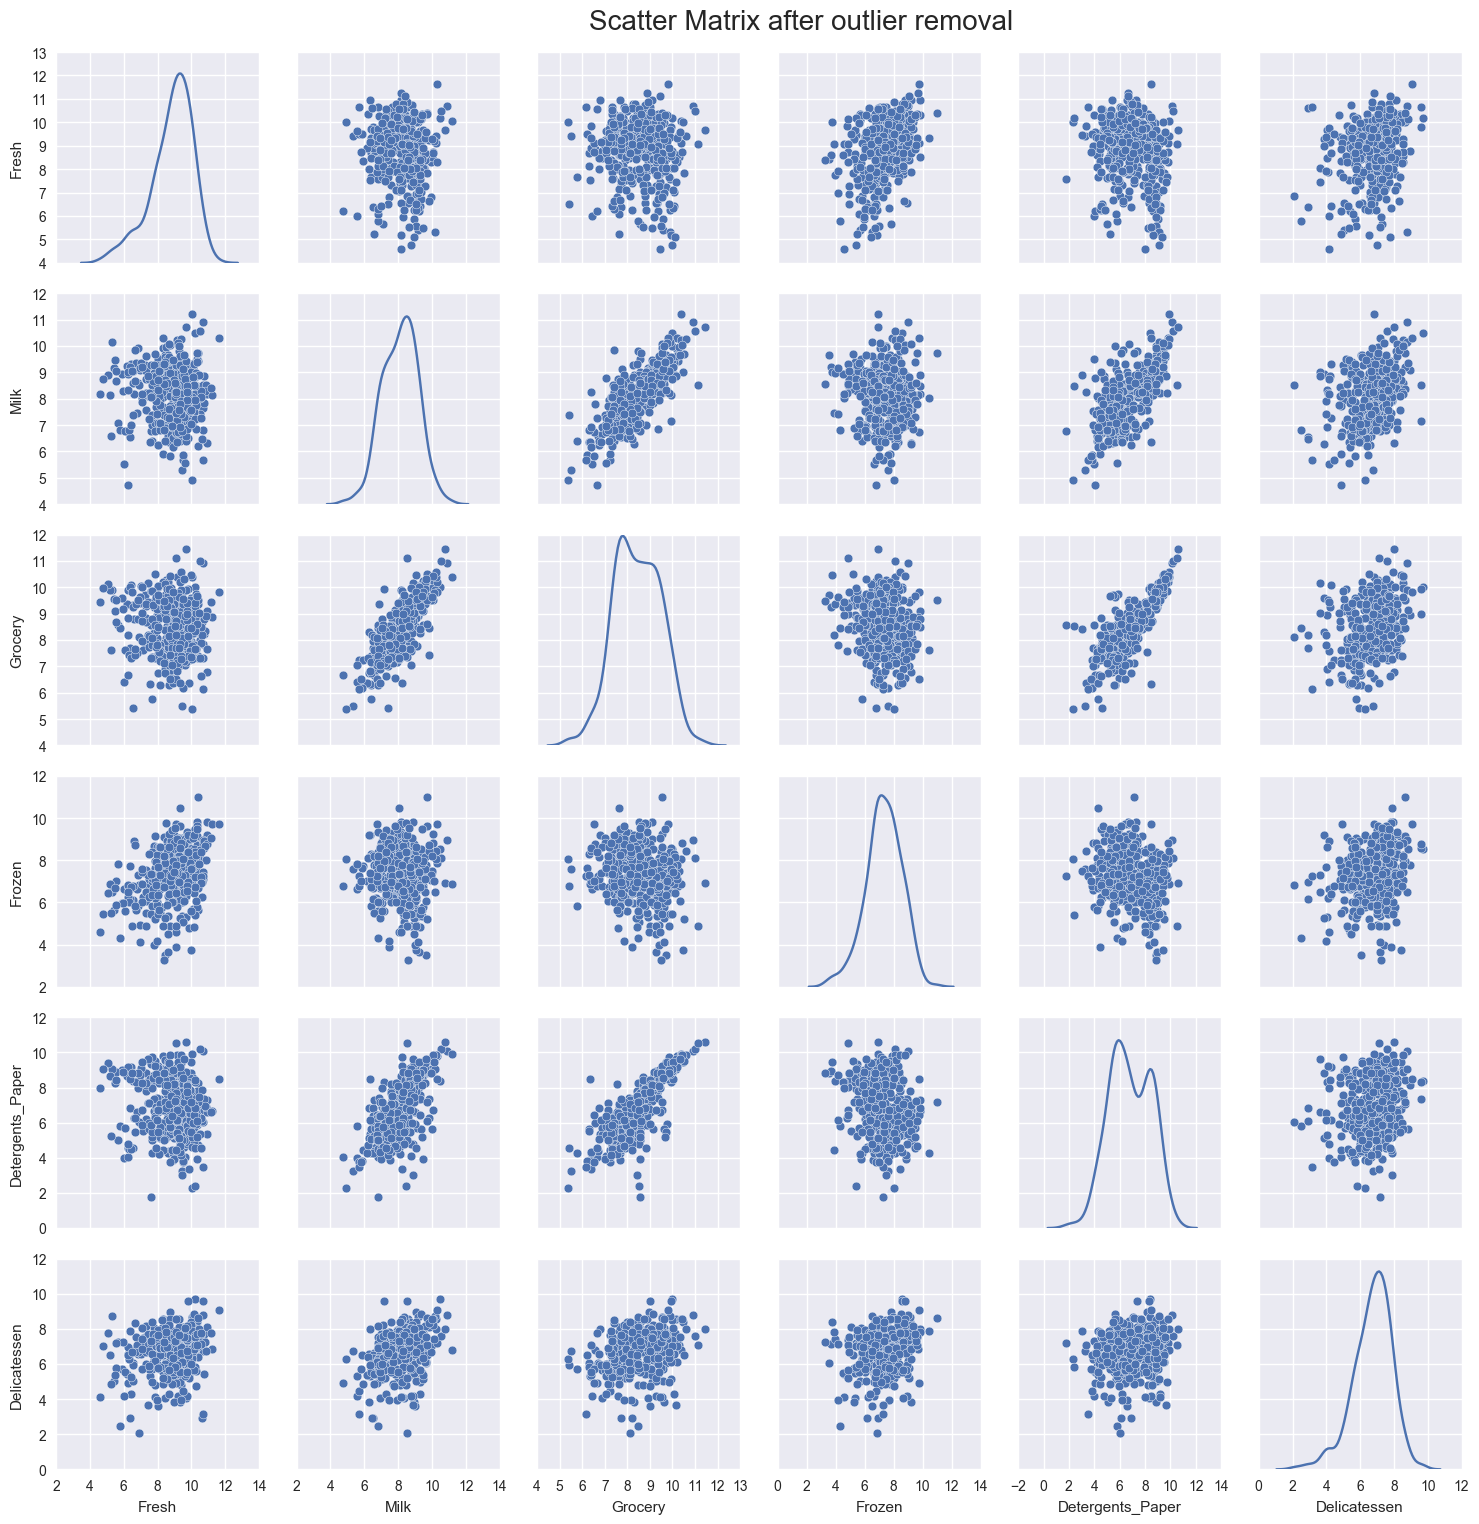

In [13]:
g = sns.pairplot(good_data, diag_kind="kde", plot_kws=dict(s=40, edgecolor="w"))
g.fig.text(0.4, 1.00,'Scatter Matrix after outlier removal', fontsize=20)

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

From the scatter matrix, after log transformation, and also from the statistical description of the dataset it is apparent that there are many outliers in the dataset. 

Outliers are data points that are distant from other observations. These outliers may occur due to error in data or just that the data is so. It is necessary to remove outliers from the data set so that the model is robust to outliers. A clusterring algorithm can be highly sensitive to outliers and thus should be removed. 

It is thus necessary to remove the outliers for better segmentation of customers based on their spending habits.  

The selected outliers are as follows:

- Indices of Outliers that occurred in more than one features: **65  66  75 128 154**. 
- Indices of Outliers that were mostly distant from other observations: **95 96 109 142 161 183 187 218 338 357**

Thus there are around 15 outliers selected, and have been removed from the dataset. There are now 425, data points in the dataset.

Data points selected in the outlier are either of a very low or very high purchase cost for their respective product category suggesting that these may be noisy data, or that the businesses representing these points have had an exceptionally good business in that category or visa versa. These values do not represent the true spending habits of customers and may mislead the clustering algorithm, thus should be removed.

---


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

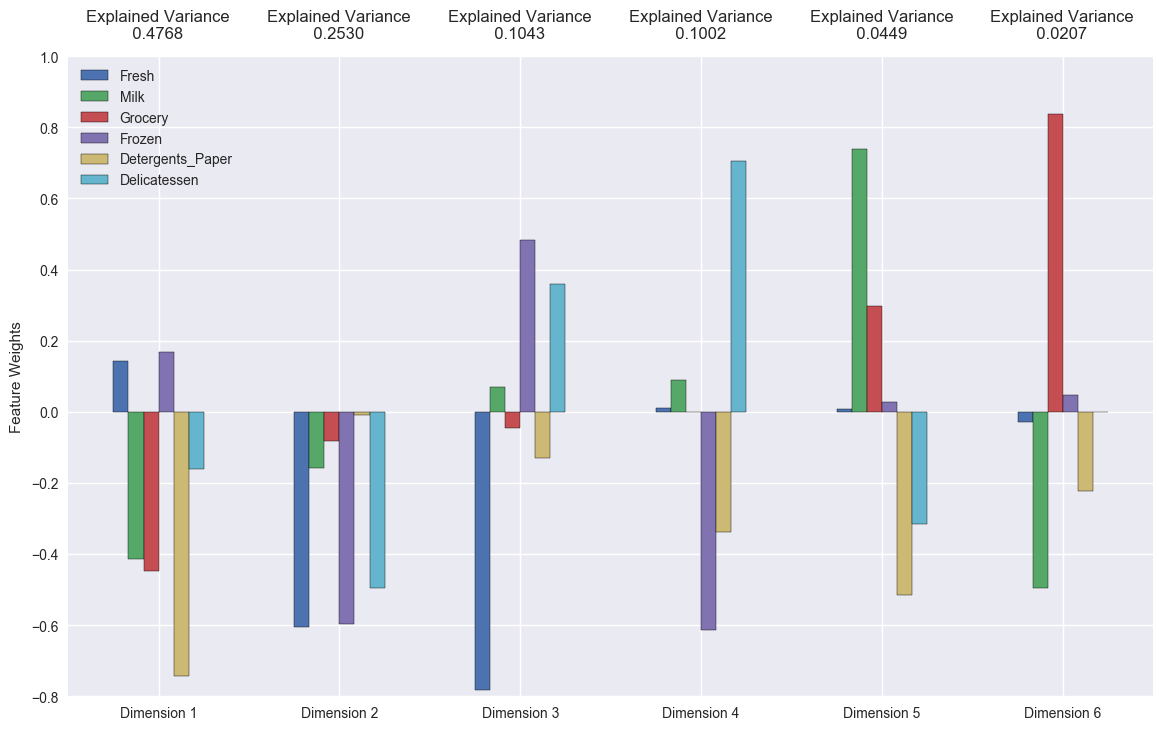

In [14]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA().fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [15]:
display(pca_results)
print "Explained Variance of First two components: {:.4f}".format(sum(pca_results["Explained Variance"][:2]))
print "Explained Variance of First four components: {:.4f}".format(sum(pca_results["Explained Variance"][:4]))

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4768,0.1439,-0.4142,-0.4469,0.1693,-0.7440,-0.1608
Dimension 2,0.2530,-0.6045,-0.1569,-0.0815,-0.5976,-0.0094,-0.4961
Dimension 3,0.1043,-0.7829,0.0709,-0.0464,0.4830,-0.1309,0.3598
Dimension 4,0.1002,0.0103,0.0888,-0.0016,-0.6147,-0.3390,0.7065
Dimension 5,0.0449,0.0074,0.7390,0.2982,0.0276,-0.5146,-0.3152
Dimension 6,0.0207,-0.0281,-0.4948,0.8382,0.0479,-0.2224,-0.0005


Explained Variance of First two components: 0.7298
Explained Variance of First four components: 0.9343


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The first principal component explains around 47% of the variations of the data. The second principal explains around 25% of the variations and together these two components explain around 73% of the variations, while more than 93% variation in the first four.

#### First PC
The first principal component is the linear combination of data points that has maximum variance, so it accounts for as much variation in the data as possible. It is strongly correlated with three of the original variables, that is, Milk, Grocery and Detergents_Paper. 

**1st PC = +0.1439 Fresh -0.4142 Milk -0.4469 Grocery	+0.1693 Frozen -0.7440 Detergents_Paper -0.1608 Delicatessen**

The first principal component decreases significantly when the value of Milk, Grocery and Detergents_Paper purchases increases, and visa versa. Thus, we can say that this component identifies the customers which has a high purchase value of Milk, Grocery and Detergents_paper. As the feature weight of Detergents_paper is highest (inversely), this component accounts for customers who proportional spend on it is higher. The other product category affects this principal component with little changes. 

#### Second PC
The second principal component is the linear combination of features that accounts for as much of the remaining variation as possible, with the constraint that it is orthogonal to the 1st PC.

**2nd PC = -0.6045 Fresh -0.1569 Milk -0.0815 Grocery -0.5976 Frozen -0.0094 Detergents_Paper -0.4961 Delicatessen**

This component correlates with the product categories that 1st PC does not, making both orthogonal. The component is strongly correlated to Fresh, Frozen and Delicatessen. There is a decrease in the value of this PC when the value of Fresh, Frozen and Delicatessen increases. The values of the other three categories have very little affect on 2nd PC. This PC accounts for customers that purchase Fresh, Frozen and Delicatessen in equal proportions as the feature weights are quite comparable.

#### Third PC

**3rd PC = -0.7829 Fresh +0.0709 Milk -0.0464 Grocery +0.4830 Frozen -0.1309 Detergents_Paper +0.3598 Delicatessen**

This components is measure of the purchase of Fresh, Frozen and Delicatessen product category. An increase in the value of Fresh decreases the PC while increase in value of Frozen and Delicatessen increases the PC. The other three product category do not affect the PC much. This PC measures the customer that purchases Fresh & Frozen in inverse relation, that is, more Fresh and less Frozen, or more Frozen and less Fresh.

#### Fourth PC

**4th PC = +0.0103 Fresh +0.0888 Milk -0.0016 Grocery -0.6147 Frozen -0.3390 Detergents_Paper +0.7065 Delicatessen**

This components is measure of the purchase of Frozen, Delicatessen and Detergents_paper product category. An increase in the value of Delicatessen increases the PC significantly while increase in value of Frozen and Detergents_paper decreases the PC. The other three product category do not affect the PC much. This PC thus accounts for customers that spend more on Delicatessen and less on Frozen or visa versa.

From the explaination of the first two principal component we can see that there is an attempt to separate customer spending habits based on the purchases of the product category now divided in two based on those PCs.

As per the discussion on the forum, the inverted PCA does not affect the clustering algorithm.

My Biplot is Inverted [1]  
Visualizing a Biplot: directions wrong? [2]  

[1]: https://discussions.udacity.com/t/my-biplot-is-inverted/228916
[2]: https://discussions.udacity.com/t/visualizing-a-biplot-directions-wrong/205043

---


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [16]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.3871,-1.6372,0.1553,-0.2152,-0.5943,-0.0699
1,1.7836,-1.2265,1.2291,-0.7850,-0.2570,0.2004
2,-0.4252,-0.2595,-1.0679,-0.1471,-0.2148,-0.2360


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [17]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

PCA Results after fitting in two dimensions


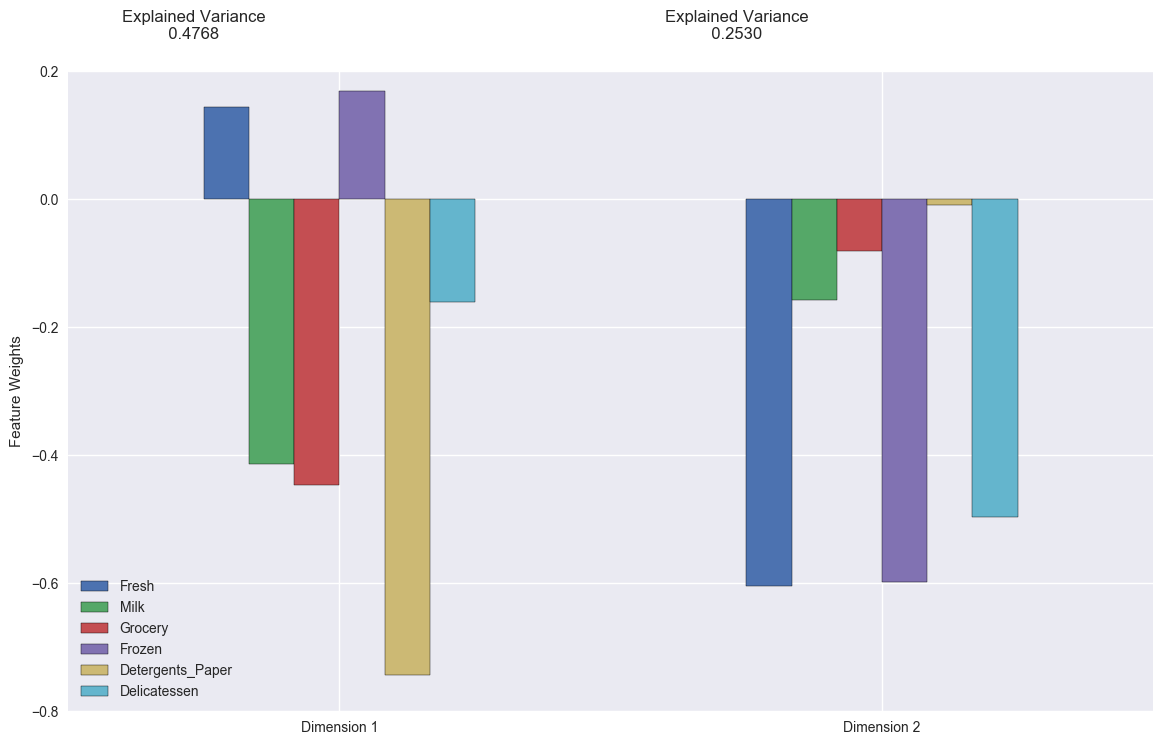

In [18]:
print "PCA Results after fitting in two dimensions"
pca_results = vs.pca_results(good_data, pca)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [19]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.3871,-1.6372
1,1.7836,-1.2265
2,-0.4252,-0.2595


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

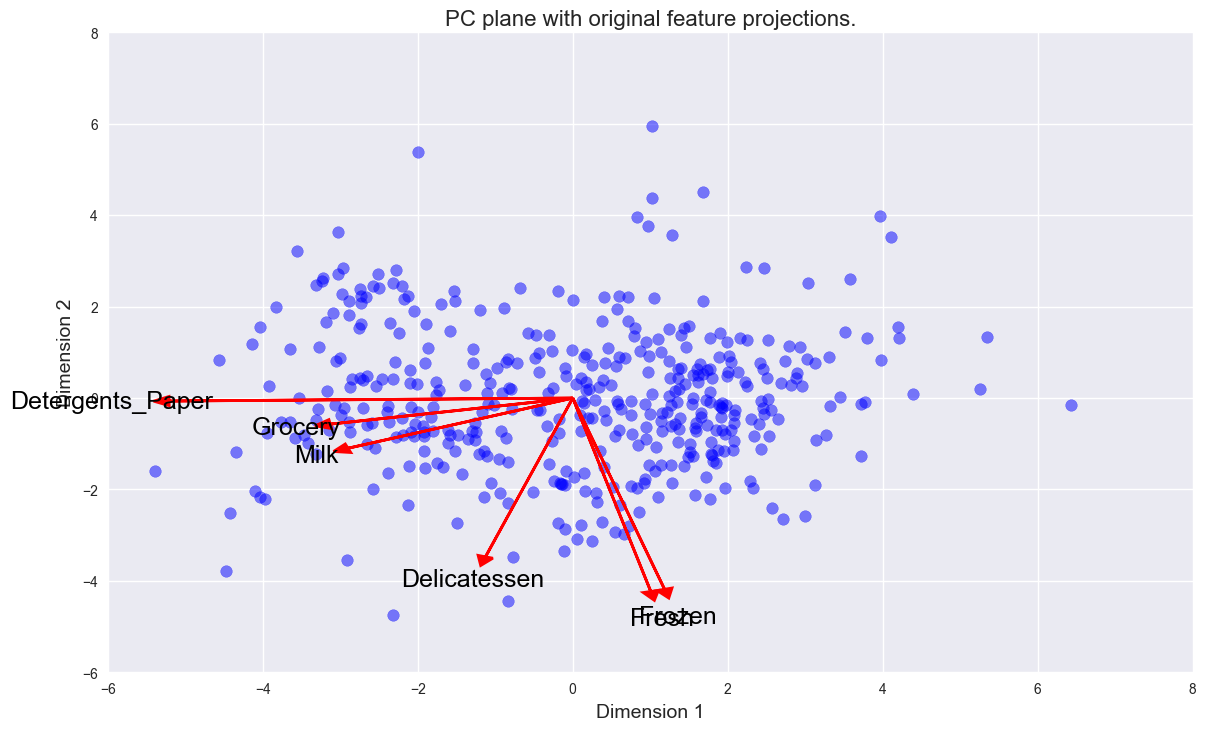

In [20]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

K-Means is the simplest clustering algorithm in unsupervised and performs computationally faster any other clustering algorithm. It produces tighter clusters than other EM based clustering algorithm and thus is also classified as hard clustering algorithm. Each data point affects the clustering mechanism, and thus hard assigns each point to one particular cluster on convergence.

Gaussian Mixture Model clustering algorithms are soft clustering techniques, each data point is assigned to clusters using the probability of that point belonging to a centroid. It is based on expectation, that is, the probability of the point belonging to a particular cluster. These models are flexible.

Based on the data, the statistical information about the data and the principal component analysis, we can see that there are several points that overlap and does not clearly fall on a particular spending habits. Thus, opting for Gaussian Mixture Model is most appropriate as it evaluates clusters based on probability, it does not create a hard boundry but allows smoothness as is required here. 

---


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [21]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
warnings.filterwarnings("ignore", category = DeprecationWarning)

from random import randint
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

print "Using KMeans Cluster"
for n_cluster in range(2,7):
    clusterer = KMeans(n_clusters=n_cluster, random_state=10).fit(reduced_data)

# TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
    centers = clusterer.cluster_centers_ #means_

# TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print "Number of Cluster: {}, Score: {:.4f}".format(n_cluster, score)

print "Using GMM Mixture"
for n_cluster in range(2,7):
    for ctype in ["spherical", "tied", "diag", "full"]:
        clusterer = GMM(n_components=n_cluster, covariance_type = ctype).fit(reduced_data)

# TODO: Predict the cluster for each data point
        preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
        centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
        sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
        score = silhouette_score(reduced_data, preds)
        print "Number of Cluster: {}, Covariance Type:{}, Score: {:.4f}".format(n_cluster, ctype, score)


Using KMeans Cluster
Number of Cluster: 2, Score: 0.4358
Number of Cluster: 3, Score: 0.3457
Number of Cluster: 4, Score: 0.3333
Number of Cluster: 5, Score: 0.3545
Number of Cluster: 6, Score: 0.3662
Using GMM Mixture
Number of Cluster: 2, Covariance Type:spherical, Score: 0.4377
Number of Cluster: 2, Covariance Type:tied, Score: 0.4327
Number of Cluster: 2, Covariance Type:diag, Score: 0.4331
Number of Cluster: 2, Covariance Type:full, Score: 0.4269
Number of Cluster: 3, Covariance Type:spherical, Score: 0.3396
Number of Cluster: 3, Covariance Type:tied, Score: 0.3134
Number of Cluster: 3, Covariance Type:diag, Score: 0.3202
Number of Cluster: 3, Covariance Type:full, Score: 0.2665
Number of Cluster: 4, Covariance Type:spherical, Score: 0.3512
Number of Cluster: 4, Covariance Type:tied, Score: 0.3306
Number of Cluster: 4, Covariance Type:diag, Score: 0.3211
Number of Cluster: 4, Covariance Type:full, Score: 0.2550
Number of Cluster: 5, Covariance Type:spherical, Score: 0.2933
Number 

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

The above code implements the two clustering algorithm **K-Means and GMM** for clusters **2 to 6**. We can see that GMM with *cluster 2* and Covariance Type *spherical* has the best silhouette score. Hence, the has been used to find the cluster and find the customer segments.

---


In [22]:
from sklearn.mixture import GMM
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
clusterer = GMM(n_components=2, covariance_type = "spherical").fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print "Cluster Number: 2", "Score: {:.4f}".format(score)

Cluster Number: 2 Score: 0.4377


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

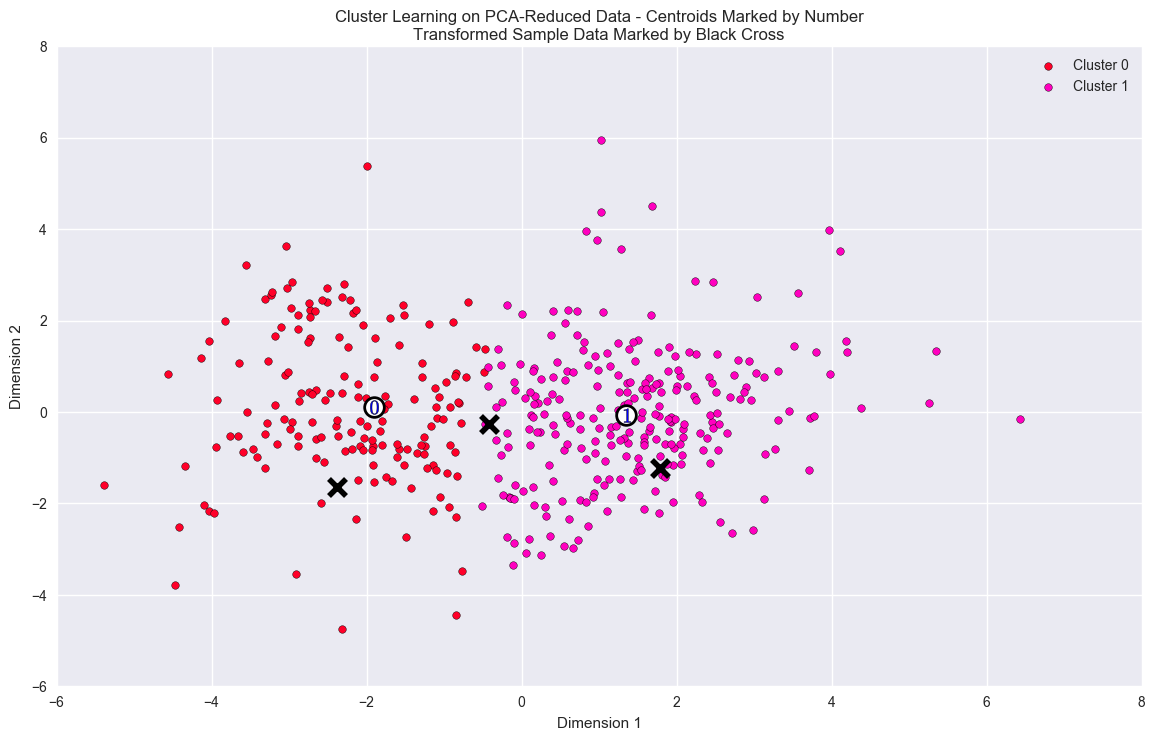

In [23]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [24]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
print "The four Quantile of data"
display(data.quantile([.25, .5, .75, 1.0]))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4929.0,7327.0,10828.0,1035.0,3797.0,1080.0
Segment 1,8747.0,1955.0,2564.0,1993.0,337.0,697.0


The four Quantile of data


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0.25,3127.75,1533.00,2153.00,742.25,256.75,408.25
0.50,8504.00,3627.00,4755.50,1526.00,816.50,965.50
0.75,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
1.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

#### 1. Segment 0  
From the total purchase cost of each product category we find that the representing establishment of Segment 0 could be concerns which has very high consumption of almost all categories, as all the amount are four or above four digits. There is high consumption of *Milk, Grocery and Detergent_Paper*, nearer to third quartile for their respective categories. We can thus derive at the fact that these business could be **large or small retail organization** selling any multiple categories of product. 

#### 2. Segment 1   
Comparing the total purchase cost of each product category to the statistical description of dataset we can draw that categories *Milk, Grocery, Detergent_paper and Delicatessen* are near the first quartile of their respective categories, while the purchase cost of *Fresh and Frozen* is around the median. This suggets that there is greater consumption of *Fresh and Frozen* product categories in establishments represented by Segment 1. 

Businesses over utilizing *Fresh and Frozen*, while under utilizing the other categories, indicate that they prepare food from fresh & frozen products and sell. Such kind of concern are usually **Restaurants** or any other operation such as **Fast foods, cafes, hotels**, where food is prepared and sold.

---


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [25]:
display(samples)
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11594,7779,12144,3252,8035,3029
1,7034,1492,2405,12569,299,1117
2,17565,3686,4657,1059,1803,668


Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**

The output of the clustering algorithm for the samples are:

- Sample 0 - Retailer of some kind
- Sample 1 - Restaurant, Fast food, cafe, hotel
- Sample 2 - Restaurant, Fast food, cafe, hotel

We can see that based on the argument in Question 8, the output are consistent with the segment represented by their centers.

The output is also matching the prediction for Sample 0 and Sample 1 as mentioned in Question 1. However, Sample 2 is not consistent with the argument presented in Question 1. This could be because this sample lies in the section where the cluster is divided. The spending habit of this customer is not clearly falling in entirely in either one of the cluster thus giving an inconsistent result.

---


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

The algorithm used above has separated the customers into two clusters based on their spending habits. This information can be used by the distributor to conduct an A/B test. 

Separate A/B test should be conducted for the different segments, as for an A/B test we need to take into account homogenous groups. Each segment should be divided into control and variation group, so that the reaction from the two groups can be compared. 

If the variation group of Segment 0 is satisfied with the change then the schedule can be changed for the entire group, and if the new schedule is also approved by variation group of Segment 1 then it can be changed for all the customers. 

This way the distributor can evaluate the feedbacks from the different segments and implement the new schedule based on the results. A/B test will allow the distributor to evaluate earlier the impact of the changes rather than loosing the customer base.

---


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

The *'customer segment'* identified by the above clustering algorithm can be considered as a new feature for the data, as mentioned above in the question. This new feature named as **Customer Segment** can be considered as the target variable for classfying the new customer with respective to their anticipated annual spending of each product category.

We can use a Supervised Classifier such as DecisionTreeClassifier to train on the known *customer segment* feature, identified from the clustering algorithm above, and their annual spending of each product category. Using the estimates of the annual spending of each product category of the new customers, acquired by the wholesale distributor, as the feature, the *customer segment* can be predicted from this classifier. Thus the target variable for the learner will be **customer segment** and the wholesale customer data as the training and validation set for training the learner.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

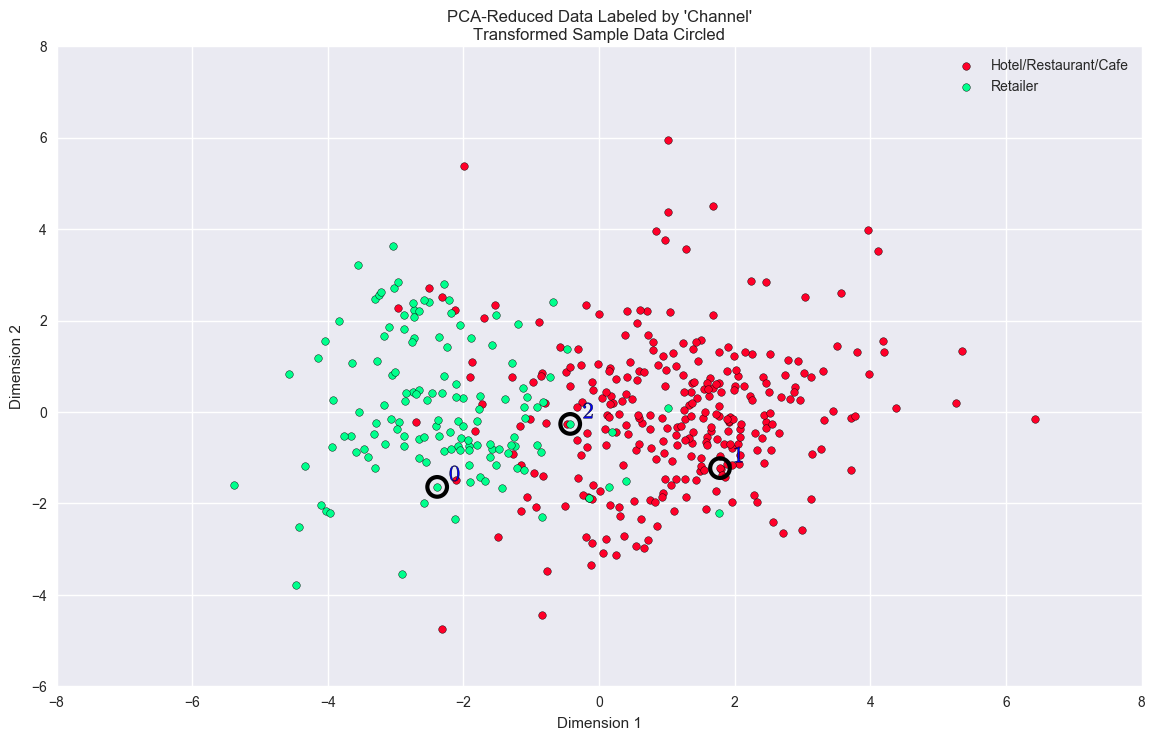

In [26]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

From the above scatter diagram, showing the cluster formed by the clustering algorithm, it is evident that the data set has been divided into two clear segments dividing them at just above zero for the value of the first component of the PCA. The distribution of Hotel/Restaurant/Cafe customers to Retailer customers shown in the scatter plot above is resembling the clustering results of the algorithm. In the above plot, the separation has been done at a value just above zero for the first component of the PCA.  

However, we can see that there are many data points that are overlapping across the two segments, implying that some customers are not classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution. There are customers that do not identify with the segmentation done above by the clustering algorithm, although we largely get consistent result.

The classification revealed now is mostly consistent with the previous assumptions made in Question 8 regarding the different type of cusotmer segments. The assumptions made classified two segments

- Segment 0 - Restaurant/cafe 
- Segment 1 - Retailer

---

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.